# Coursework 1

## Question 1.a
Partition the provided face data into your training and testing data, in a way you choose.
Explain briefly the way you partitioned. Apply PCA to your training data i.e. compute the
eigenvectors and eigenvalues of the covariance matrix S=(1/N)AA T directly. Show and discuss, including: the eigenvectors and eigenvalues, the mean image, how many
eigenvectors are with non-zero eigenvalues, and how many eigenvectors are to be used
for face recognition. Give physical meanings behind your answers.

### Loading Face Dataset

In [3]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

mat_content = sio.loadmat( 'face(1).mat' )

mat_content

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13,

* __X__ contains the face data, where each column of __X__ is a one image from a total of 520 images.
* __l__ contains the label/face identity of each image

In [4]:
face_data = mat_content[ 'X' ]

print( face_data.shape )

(2576, 520)


Each image is a column that is 2576 values long.

In [5]:
face_157 = face_data[:,157]

print(face_157.shape)
print(face_157)

(2576,)
[ 55  55  54 ... 168 168 174]


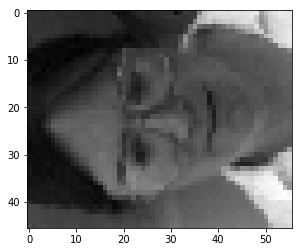

In [6]:
# face data is in 46x56 format

face_157 = np.reshape(face_157,(46,56))

plt.imshow(face_157, cmap = 'gist_gray')

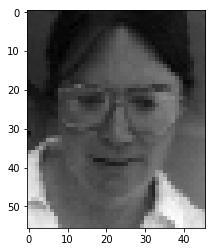

In [7]:
face_157 = face_157.T
plt.imshow(face_157,cmap = 'gist_gray')

In [8]:
face_labels = mat_content['l']
print(face_labels[0,157])

16


___
### Splitting into Training and Test Sets
If the number of values belonging to each class are unbalanced, stratified sampling is a good thing, since it keeps the class proportions in the training and test sets from the whole dataset.

For this dataset, we have 520 images, but 52 faces. Each identity has 10 images, so we have balanced classes. As such, a purely random shuffle should give a fair test and train split.

From [StackOverflow: Stratified Sampling Necessary?](https://datascience.stackexchange.com/questions/16265/is-stratified-sampling-necessary-random-forest-python)

In [9]:
print( face_data.shape )

(2576, 520)


#### Reshaping Data Set
Personally, I find it weird having each image in a column as opposed to a row. In my head, it makes much more sense of each image was in a row.

Tranpose the dataset, so we have __520__ rows, each one __2576__ long containing a face image.

In [10]:
face_data_row = face_data.T
print( face_data_row.shape )

(520, 2576)


In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split( face_data_row, test_size = 0.2, random_state = 42 )

In [13]:
print( 'Train Set: {}, Percentage: {} %'.format( train_set.shape, 100*train_set.shape[0] / face_data_row.shape[ 0 ] ) )
print( 'Test  Set: {}, Percentage: {} %'.format( test_set.shape, 100*test_set.shape[0] / face_data_row.shape[ 0 ]) )

Train Set: (416, 2576), Percentage: 80.0 %
Test  Set: (104, 2576), Percentage: 20.0 %


#### Dataset with labels
It might be a good idea to have the identity labels attached to the dataset

In [14]:
face_data_labels = mat_content[ 'l' ]

print( 'Face Data Shape: {}'.format( face_data.shape ) )
print( 'Face Data Labels Shape: {}'.format( face_data_labels.shape ) )

Face Data Shape: (2576, 520)
Face Data Labels Shape: (1, 520)


In [15]:
faceDataLabeled = np.vstack( ( face_data, face_data_labels ) )

print( 'Face Data Labeled Shape: {}'.format( faceDataLabeled.shape ) )

Face Data Labeled Shape: (2577, 520)


We now have a dataset __faceDataLabeled__ which contains the images with their identities in the bottom-most row.

In [17]:
rowLabel = faceDataLabeled[ 2576 ]

___
### Applying PCA 
We dont actually need class labels for PCA analysis, so we can use the **train_set** data set instead of the __faceDataLabeled__ data set.

#### Calculate d-dimensional mean vector
We have 2576 dimensions, need to calculate the mean for each dimension to get the mean face.

In [16]:
train_set[ : 1] # Access a row

print( train_set[ : , 1 ].shape ) # Access a column

(416,)


In [18]:
# Some dirty list comprehension below. Essentially iterate over the columns in the train_set and calculate
# mean for each column ( d means )
mean_face_row = np.array( [ [ np.mean( train_set[ : ,col ] ) for col in range( train_set.shape[ 1 ] ) ] ] ) 

print( 'Mean Vector: \n {}'.format( mean_face_row ) )

Mean Vector: 
 [[124.06971154 123.26682692 121.08413462 ...  85.33653846  83.44711538
   81.86298077]]


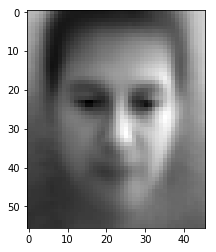

In [19]:
mean_face_img = np.reshape(mean_face_row,(46,56))

plt.imshow( mean_face_img.T, cmap = 'gist_gray')

#### Computing Covariance Matrix

In [20]:
cov_mat = np.cov( [ col for col in train_set.T ] )

print( 'Shape of cov_mat: {}'.format( cov_mat.shape ) )

Shape of cov_mat: (2576, 2576)


The covariance matrix contains the covariance between each pair of features, all 2576 of them, resulting in a $2576\times2576$ matrix. Along the main diagonal of the matrix, we have the variance of the feature.

The mean vector is often referred to as the centroid and the variance-covariance matrix as the dispersion or dispersion matrix. Also, the terms variance-covariance matrix and covariance matrix are used interchangeably. 

[Mean Vector and Covariance Matrix](https://www.itl.nist.gov/div898/handbook/pmc/section5/pmc541.htm)

##### Why do we need the covariance matrix?

The following article is a __mustread__. It goes over the covariance matrix, and why calculating the eigenvectors is important.

[A geometric interpretation of the covariance matrix](http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/?fbclid=IwAR2HCYZtV9m7_miA3YeMD2Cpx5w9wT8UlO3ncGWiJN-FNHvx3Tvsz2bgUJc)

#### Computing Eigenvectors and corresponding eigenvalues

Eigenvectors and eigenvalues uniquely define the covariance matrix, and as such, the data set.

In [21]:
eig_val, eig_vec = np.linalg.eig( cov_mat )

In [22]:
eig_val.shape

(2576,)

We can interpret the covariance matrix as a linear operator that transforms white data into the data that is observed in the training set.

The covariance matrix defines both the spread and orientation of our data. We would like to represent the covariance matrix with a vector and its magnitude. What we want to do is find the vector that points into the direction of the largest spread of data, and whose magnitude equals the spread in that direction.

Define the vector $\textbf{v}$, and the dataset $\textbf{D}$. The projection of the data onto this vector is $\textbf{v}^T \textbf{D}$, and the variance is $\textbf{v}^T\sum \textbf{v}$

We want the vector that points in the direction of largest variance, so we choose components such that the covariance matrix of the projected data is as large as possible. This is achieved by setting $\textbf{v}$ equal to the largest eigenvector of the covariance matrix. The second largest eigenvector is always orthogonal to the largest eigenvector, and points into the direction of the second largest spread of data.

#### Sorting eigenvectors based on eigenvalues

In [30]:
eig_pairs = [ (np.abs( eig_val[ i ] ), eig_vec[ :, i ] ) for i in range( len( eig_val ) ) ]

eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

for i in eig_pairs:
    print( i[ 0 ])

927253.6841063226
533813.8378604058
449959.47998223355
263874.7054866029
223942.4734027269
142059.1006869503
133012.73500235856
116332.77629895536
99478.55501971251
81207.798040714
62483.505273194605
58698.96440793413
52337.07132887371
51218.497221054684
45745.37628656076
42273.46899059601
39672.50501857013
35423.4836882811
33807.73328415793
32806.523478048475
29535.33327749414
26433.381405067423
25743.795385880465
24553.295271622013
22854.450963161347
22305.221658975064
21003.57726105602
20035.86747639572
19145.239210888383
18629.475853845714
17997.25518583384
17198.039266303025
16997.833201324236
15861.863719660796
15548.106162564676
14341.336991784057
13953.47842261467
13843.367529751671
13194.075603726396
12771.54746898193
12426.51804805133
11707.66784847261
11391.573825798805
11139.390881573701
10885.840639905007
10549.77392290784
10092.122494709374
9875.183183397721
9649.106573224984
9465.733475121444
9027.94292720351
8848.458328396977
8641.361657973424
8357.733865169166
8265.590

4.3945153394672365e-12
4.3945153394672365e-12
4.379088518600631e-12
4.379088518600631e-12
4.373522673670996e-12
4.373522673670996e-12
4.369604362825795e-12
4.369604362825795e-12
4.356244641161067e-12
4.356244641161067e-12
4.3527085695496976e-12
4.3527085695496976e-12
4.342715528311789e-12
4.342715528311789e-12
4.314238220714631e-12
4.314238220714631e-12
4.2998465662658865e-12
4.2998465662658865e-12
4.295399997674834e-12
4.295399997674834e-12
4.286312650919531e-12
4.286312650919531e-12
4.270812786221681e-12
4.270812786221681e-12
4.265378474213754e-12
4.265378474213754e-12
4.246304166020853e-12
4.246304166020853e-12
4.244820637147887e-12
4.244820637147887e-12
4.2417923445274114e-12
4.2417923445274114e-12
4.240929122636867e-12
4.240929122636867e-12
4.234276763888072e-12
4.234276763888072e-12
4.190569949111509e-12
4.190569949111509e-12
4.183448970982837e-12
4.183448970982837e-12
4.178924591924685e-12
4.178924591924685e-12
4.1780361361439275e-12
4.1780361361439275e-12
4.160645381651138e-12


By quickly scrolling through the ordered eigenvalue eigenvector pairs, we can see that as we reach the bottom, we have eigenvalues which are very small (order of magnitude $10^{-11}$ and smaller). This suggests that these eigenvectors have the smallest spread of data. 

For the purpose of PCA